In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
#labels
LABELS = ['Standing',
          'Sitting',
          'Lying',
          'Squatting',
          'Walking',
          'Bending']

labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('training/trainAccelerometer.npy')
train_gra = np.load('training/trainGravity.npy')
train_gyr = np.load('training/trainGyroscope.npy')
train_lin = np.load('training/trainLinearAcceleration.npy')

train_mag = np.load('training/trainMagnetometer800.npy')

trainJins_acc = np.load('training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('training/trainMSGyroscope800.npy')

train_label = np.load('training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('testing/testAccelerometer.npy')
test_gra = np.load('testing/testGravity.npy')
test_gyr = np.load('testing/testGyroscope.npy')
test_mag = np.load('testing/testMagnetometer800.npy')
test_lin = np.load('testing/testLinearAcceleration.npy')

testJins_acc = np.load('testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('testing/testJinsGyroscope800.npy')

testMS_acc = np.load('testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('testing/testMSGyroscope800.npy')

test_label = np.load('testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

In [ ]:
#ToDo: : smartphone/smartwatch placed in the left pocket/on the left arm differences 
#between left and right hand executions for some behavioural activities

In [3]:
#create input feature vector

#train vector
train_data = [train_gyr, train_mag, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
#print(train_features)


#test vector
test_data = [ test_gyr, test_mag, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.shape[0])
print(test_features.dtype)
#print(test_features[0])

(2284, 800, 27)
(2288, 800, 27)
2288
float32


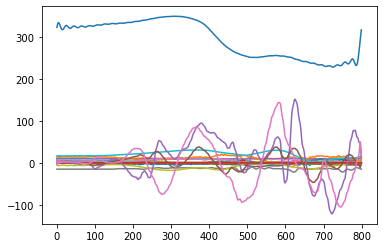

Bring


In [4]:
#print(test_label)
#print(train_features)
#all samples of first activity
n = 0
plt.plot(train_features[n])
plt.show()
print(labeldict[n])

In [5]:
#set input and output dimensions
num_time_periods, num_sensors = train_features.shape[1], train_features.shape[2]
num_classes = 55

#keras are not able to process multi-dimensional input data - data needs to be flatten - from 800x27 to 21600 values
input_shape = (num_time_periods * num_sensors)
train_features = train_features.reshape(train_features.shape[0], input_shape)

print('train_features shape:', train_features.shape)
print('input_shape:', input_shape)

train_features shape: (2284, 21600)
input_shape: 21600


In [7]:
#create model
#number of hidden layer: around (number of inputs + 1)/2

#(input: ?-dimensional vectors) 
#       ↧

#.
#.
#.
#       ↧
#[Dense (1? units, softmax activation)]
#       ↧
#(output: integer for human activity (0-54))

#training data:
X_train = train_features
Y_train = train_label

X_test = test_features
Y_test = test_label

#create layers - ToDo: need to be adapted
TIME_PERIODS = 800

model = Sequential()
model.add(Reshape((TIME_PERIODS, 27), input_shape=(input_shape,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

model.summary()

##stop training with best model if no improvement of loss after 1 iteration
callbacks_list = [
keras.callbacks.ModelCheckpoint(
    filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_loss', save_best_only=True),
keras.callbacks.EarlyStopping(monitor='loss', patience=1)
]

#ToDo: evaluation metrices that has to be used (objectives of project): accuracy, Average F1-score 
# and Mean Average Precision (code provided on moodle)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the train set
BATCH_SIZE = 400
EPOCHS = 50
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks_list, validation_split=0.2, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 800, 27)           0         
                                                                 
 dense (Dense)               (None, 800, 100)          2800      
                                                                 
 dense_1 (Dense)             (None, 800, 100)          10100     
                                                                 
 dense_2 (Dense)             (None, 800, 100)          10100     
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 80001     
                                                                 
Total params: 103,001
Trainable params: 103,001
Non-trai